In [78]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from sklearn.model_selection import train_test_split

train = pd.read_excel('EPL_Training.xlsx')
test = pd.read_excel('EPL_Testing.xlsx')

train2=train.drop(['HomeTeam','AwayTeam'], axis=1)                                      
test2=test.drop(['HomeTeam','AwayTeam'], axis=1)

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

average_errors=[1]*10

for i in range (1000):
    
    train_list,test_list=train_test_split(train2, test_size=0.05, shuffle=True)
    
    train_1 = train_list.drop('FTR', axis=1)
    train_2 = train_list['FTR']
    test_1 = test_list.drop('FTR', axis=1)
    test_2 = test_list['FTR']
#in arrays 
    train_1=train_1.to_numpy()
    train_2=train_2.to_numpy()
    test_1=test_1.to_numpy()
    test_2=test_2.to_numpy()
    
    ftr_train=[1]*len(train_2)
    ftr_test=[1]*len(test_2)
    
    for i in range(len(train_2)):
        if train_2[i]=="H":
            ftr_train[i]=0
            
    for i in range(len(test_2)):
        if test_2[i]=="H":
            ftr_test[i]=0
            
    for K in range(10):
        Model = neighbors.KNeighborsClassifier(n_neighbors = K+1)
        Model.fit(train_1, ftr_train)  
        prediction=Model.predict(test_1) 
        for i in range(len(ftr_test)-1):
            if ftr_test[i]!=prediction[i]:    
                average_errors[K-1]+=1   


In [86]:
k=min(average_errors)
for i in range(len(average_errors)):
    if(k==average_errors[i]):
        k=i+1    

train_1 = train2.drop('FTR', axis=1)
train_2 = train2['FTR']
test_1 = test2.drop('FTR', axis=1)
test_2 = test2['FTR']
    
train_1=train_1.to_numpy()
train_2=train_2.to_numpy()
test_1=test_1.to_numpy()
test_2=test_2.to_numpy()
print(average_errors)





[1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]


In [81]:

ftr_train=[1]*len(train_2)
ftr_test=[1]*len(test_2)
    
for i in range(len(train_2)):
    if train_2[i]=="H":
        ftr_train[i]=0
            
for i in range(len(test_2)):
    if test_2[i]=="H":
        ftr_test[i]=0
        
        

In [82]:

accuracy=0
Model = neighbors.KNeighborsClassifier(n_neighbors = k)
Model.fit(train_1, ftr_train)  
prediction=Model.predict(test_1)
for i in range(len(ftr_test)-1):
    if(ftr_test[i]==prediction[i]):
        accuracy+=1
accuracy=(accuracy/len(ftr_test))*100



62.295081967213115 6
[2574, 2391, 2505, 2165, 2252, 2073, 2376, 2249, 2335, 2668]


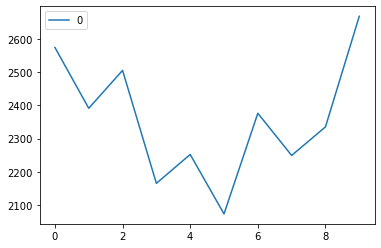

In [83]:

graph=pd.DataFrame(average_errors)
graph.plot()
print(accuracy, k)
print(average_errors)